# Dan Miller
## This Notebook will be used for Project 7 of Data Analytics Fundamentals
## 2/24/2025

## Imports

In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy import stats

## Part 1 - Chart a Straight Line

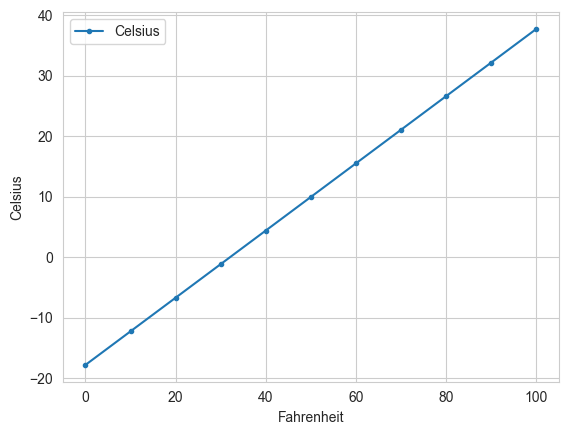

In [104]:
# Create the function
c = lambda f: 5/9 * (f - 32)

temps = [(f, c(f)) for f in range(0, 101, 10)]

# Graph
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')
plt.show()

## Part 2 - Prediction

### Section 1 - Data Acquisition

In [105]:
#Loading weather data
url = r'C:\Projects\IntroToPython\examples\ch10\ave_hi_nyc_jan_1895-2018.csv'
nyc_df = pd.read_csv(url)

### Section 2 - Data Inspection

In [106]:
# View the head of the data
print(nyc_df.head())

     Date  Value  Anomaly
0  189501   34.2     -3.2
1  189601   34.7     -2.7
2  189701   35.5     -1.9
3  189801   39.6      2.2
4  189901   36.4     -1.0


In [107]:
# View the tail of the data
print(nyc_df.tail())

       Date  Value  Anomaly
119  201401   35.5     -1.9
120  201501   36.1     -1.3
121  201601   40.8      3.4
122  201701   42.8      5.4
123  201801   38.7      1.3


### Section 3 - Data Cleaning

In [108]:
# Rename 'Value' column to 'Temperature'
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']

# Remove the '01' from the 'Date' column for readability
nyc_df.Date = nyc_df.Date.floordiv(100)

print(nyc_df.head())

   Date  Temperature  Anomaly
0  1895         34.2     -3.2
1  1896         34.7     -2.7
2  1897         35.5     -1.9
3  1898         39.6      2.2
4  1899         36.4     -1.0


### Section 4 - Descriptive Statistics

In [109]:
# Set display precision to 2 decimal places then display the stats
pd.set_option('display.precision', 2)
print(nyc_df.describe())

          Date  Temperature  Anomaly
count   124.00       124.00   124.00
mean   1956.50        37.60     0.20
std      35.94         4.54     4.54
min    1895.00        26.10   -11.30
25%    1925.75        34.58    -2.82
50%    1956.50        37.60     0.20
75%    1987.25        40.60     3.20
max    2018.00        47.60    10.20


### Section 5 - Build the Model

In [110]:
# Calculate the linear regression line
linear_regression = stats.linregress(nyc_df.Date, nyc_df.Temperature)
print((f'slope: {linear_regression.slope:.2f}\n'))  # slope
print((f'y-intercept: {linear_regression.intercept:.2f}\n'))  # y-intercept

slope: 0.01

y-intercept: 8.69



### Section 6 - Predict

In [111]:
# Predict the average high temperature in January for 2024
predicted_temp = linear_regression.slope * 2024 + linear_regression.intercept
print(f'The predicted average high temperature in January for 2024 is: {predicted_temp:.2f} Fahrenheit')

The predicted average high temperature in January for 2024 is: 38.59 Fahrenheit


### Section 7 - Visualizations

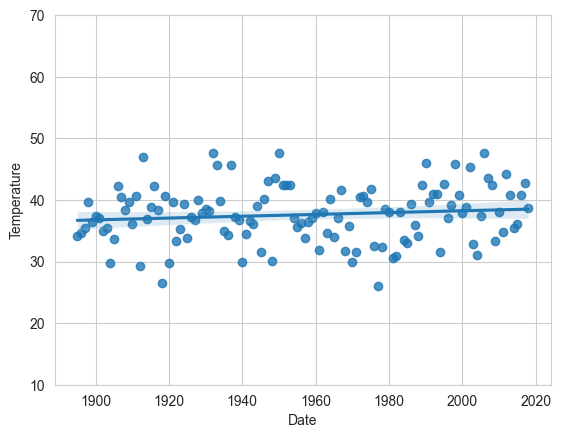

In [112]:
# Graph the linear regression line with the data
sns.set_style('whitegrid')
axes = sns.regplot(x='Date', y='Temperature', data=nyc_df)
axes.set_ylim(10, 70)
plt.show()